In [37]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from config import weatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output = "Output/weatherpy.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [38]:
# List for holding latitudes, longitudes, and cities
lat_lng = []
cities = []

# Create a set of random latitude and longitude combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lat, lng)

# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If city is unique, add to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm list is over 500
len(cities)

614

In [41]:
# Set temperature units
temp_unit = "imperial"

# Define url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weatherkey}&units={temp_unit}&q="

# Set summary lists
city2 = []
cloudinesses = []
dates = []
humidities = []
lat = []
lng = []
max_temp = []
wind_speed = []
countries = []

# Set initial count
count_one = 0
set_one = 1

# Loop for creating summary
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city2.append(city)
        else:
            count_one += 1
            city2.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City Not Found.")
print("------------------------------\nData Retrieval Complete\n------------------------------")       

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kandi
Processing Record 6 of Set 1 | mariental
Processing Record 7 of Set 1 | inhambane
Processing Record 8 of Set 1 | coahuayana
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | povenets
Processing Record 12 of Set 1 | carnarvon
City Not Found.
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | wanning
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | grand gaube
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | suntar
Processing Record 21 of Set 1 | dzerzhinsk
Processing Record 22 of Set 1 | savannah bight
Processing Record 23 of Set 1 | porto velho
Processing Record 24 of Set 1 | 

Processing Record 46 of Set 4 | fare
City Not Found.
Processing Record 47 of Set 4 | puri
Processing Record 48 of Set 4 | lucapa
Processing Record 49 of Set 4 | abu samrah
Processing Record 1 of Set 5 | mandalgovi
Processing Record 2 of Set 5 | ketchikan
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | belyy yar
Processing Record 5 of Set 5 | blairmore
Processing Record 6 of Set 5 | koroni
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | sarangani
Processing Record 9 of Set 5 | kulu
Processing Record 10 of Set 5 | muyezerskiy
Processing Record 11 of Set 5 | mumford
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | nuuk
Processing Record 14 of Set 5 | tautira
Processing Record 15 of Set 5 | faya
Processing Record 16 of Set 5 | yokadouma
Processing Record 17 of Set 5 | itoman
Processing Record 18 of Set 5 | esperance
Processing Record 19 of Set 5 | port arthur
Processing Record 20 of Set 5 | namatanai
Processing Record 21 of S

Processing Record 45 of Set 8 | ardakan
Processing Record 46 of Set 8 | cocorit
Processing Record 47 of Set 8 | porto walter
Processing Record 48 of Set 8 | abha
Processing Record 49 of Set 8 | fomboni
Processing Record 1 of Set 9 | kargasok
Processing Record 2 of Set 9 | yurimaguas
Processing Record 3 of Set 9 | dayong
Processing Record 4 of Set 9 | conakry
Processing Record 5 of Set 9 | mocuba
Processing Record 6 of Set 9 | shiyan
Processing Record 7 of Set 9 | meulaboh
Processing Record 8 of Set 9 | rengo
Processing Record 9 of Set 9 | mangrol
Processing Record 10 of Set 9 | laguna
Processing Record 11 of Set 9 | abu dhabi
Processing Record 12 of Set 9 | gaya
Processing Record 13 of Set 9 | salekhard
Processing Record 14 of Set 9 | ilam
Processing Record 15 of Set 9 | kaeo
City Not Found.
Processing Record 16 of Set 9 | port hedland
Processing Record 17 of Set 9 | pevek
Processing Record 18 of Set 9 | mizdah
Processing Record 19 of Set 9 | iringa
Processing Record 20 of Set 9 | taou

In [63]:
# Create dictionary for summary dataframe
weather_dict = {"City":city2, "Country":countries, "Latitude":lat, "Longitude":lng, "Date":dates, "Cloudiness":cloudinesses, "Humidity":humidities, "Max Temperature":max_temp, "Wind Speed":wind_speed}

# Create dataframe
weather_df = pd.DataFrame(weather_dict)

# Output to csv
weather_df.to_csv(output)

# Display dataframe
weather_df

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temperature,Wind Speed
0,busselton,AU,-33.6500,115.3333,1619221263,93,75,61.00,4.00
1,punta arenas,PH,8.9897,125.3400,1619221771,99,72,83.19,1.54
2,rikitea,PF,-23.1203,-134.9692,1619221615,100,68,78.96,15.99
3,albany,US,42.6001,-73.9662,1619221771,20,33,55.40,18.41
4,kandi,BJ,11.1342,2.9386,1619221772,80,46,85.82,6.13
...,...,...,...,...,...,...,...,...,...
557,asosa,ET,10.0667,34.5333,1619221758,53,67,66.52,4.79
558,vitina,BA,43.2375,17.4839,1619221626,20,93,50.00,1.14
559,bagdarin,RU,54.4333,113.6000,1619221406,99,41,31.30,3.02
560,gogrial,SS,8.5332,28.1004,1619221759,37,49,84.16,4.76


In [68]:
# Confirm over 500 cities
weather_df.count()

City               562
Country            562
Latitude           562
Longitude          562
Date               562
Cloudiness         562
Humidity           562
Max Temperature    562
Wind Speed         562
dtype: int64

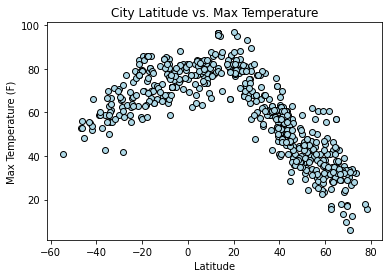

In [69]:
# Create Temperature v. Latitude Scatter
plt.scatter(weather_df["Latitude"],weather_df["Max Temperature"],edgecolors="black",facecolors="lightblue")

# Set titles and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save image
plt.savefig("Images/latvtempscatter.png")

# Display scatter
plt.show()

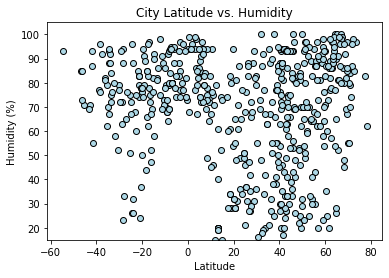

In [70]:
# Create Humidity v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="lightblue")

# Set labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set y limit
plt.ylim(15,105)

# Save image
plt.savefig("Images/latvhumidityscatter.png")

# Display scatter
plt.show()

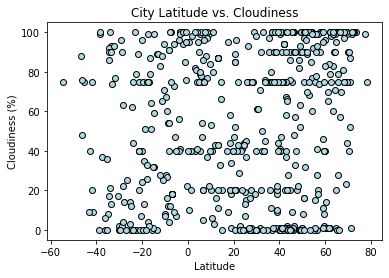

In [71]:
# Create Cloudiness v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="lightblue")

# Set title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save image
plt.savefig("Images/latvcloudinessscatter.png")

# Display chart
plt.show()

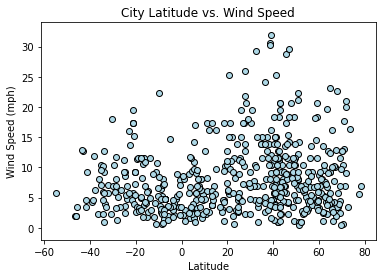

In [72]:
# Create Wind v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="lightblue")

# Set labels and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set y limit
plt.ylim(-2,34)

# Save image
plt.savefig("Images/latvwindscatter.png")

# Display chart
plt.show()

In [87]:
# Create Northern and Southern Hemisphere DataFrames
x = 0
northhem = weather_df.query(f"Latitude >= {x}")
southhem = weather_df.query(f"Latitude <= {x}")

The correlation coefficient is: -0.8832191064892001


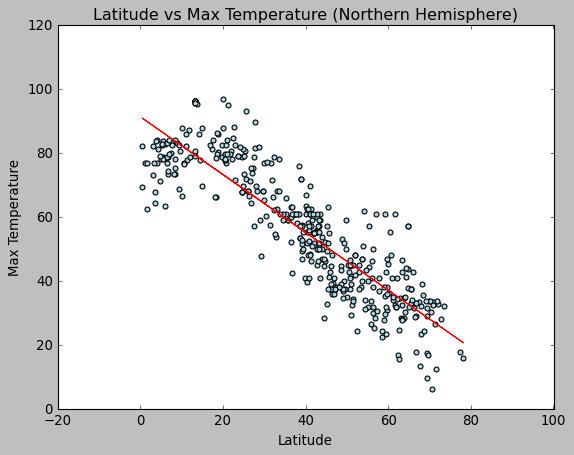

In [91]:
x_axis = northhem['Latitude']
y_axis = northhem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temperature (Northern Hemisphere)')
print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvtempnorth.png")
plt.show()

The correlation coefficient is: 0.7038777675341684


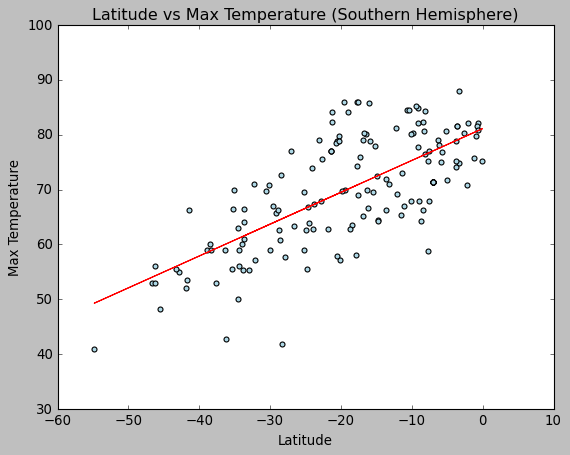

In [92]:
x_axis = southhem['Latitude']
y_axis = southhem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temperature (Southern Hemisphere)')
print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvtempsouth.png")
plt.show()

The correlation coefficient is: 0.15894296770218796


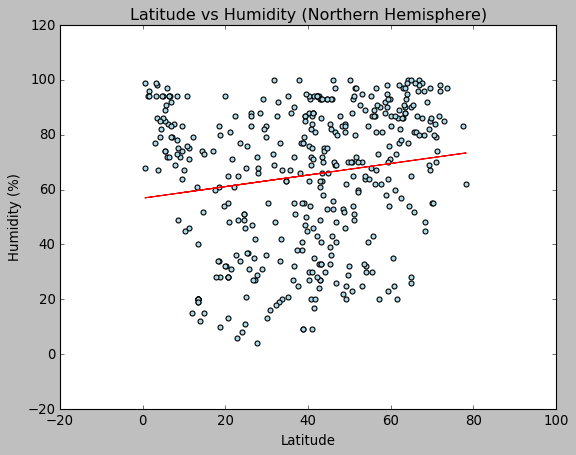

In [93]:
x_axis = northhem['Latitude']
y_axis = northhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvhumiditynorth.png")
plt.show() 

The correlation coefficient is: 0.1357801833411117


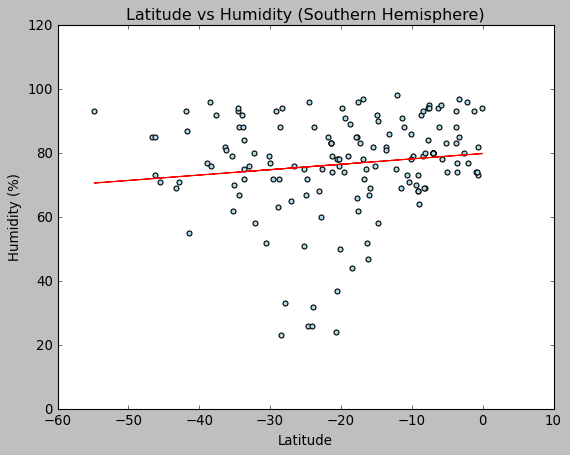

In [94]:
x_axis = southhem['Latitude']
y_axis = southhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvhumiditysouth.png")
plt.show()

The correlation coefficient is: 0.14097280711826551


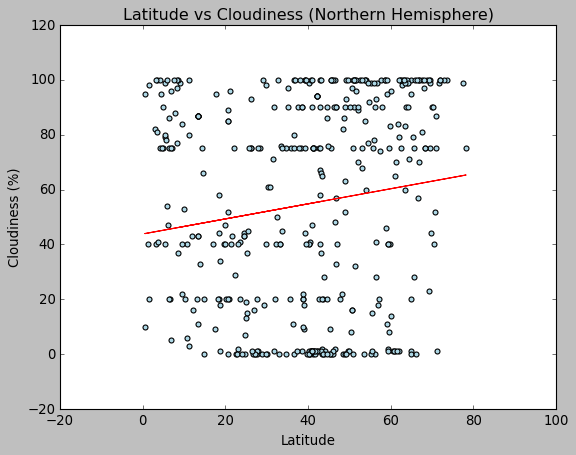

In [95]:
x_axis = northhem['Latitude']
y_axis = northhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')

print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvcloudnorth.png")
plt.show()

The correlation coefficient is: 0.10110290919124972


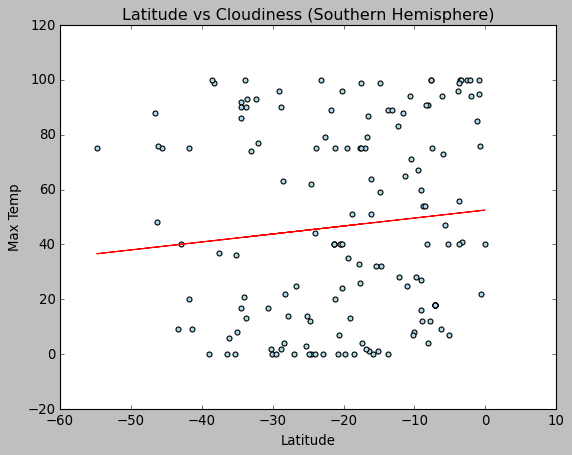

In [96]:
x_axis = southhem['Latitude']
y_axis = southhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')

print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvcloudsouth.png")
plt.show()

The correlation coefficient is: 0.052697787646939366


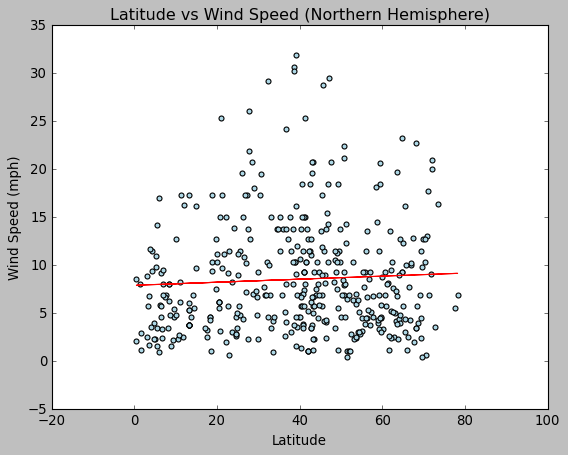

In [97]:
x_axis = northhem['Latitude']
y_axis = northhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')

print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvwindnorth.png")
plt.show()

The correlation coefficient is: -0.150894598953466


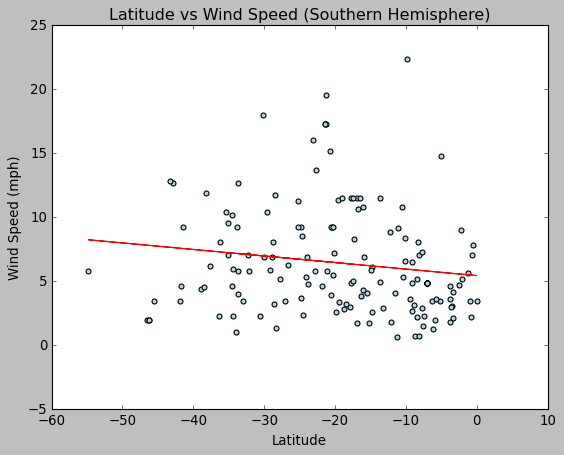

In [98]:
x_axis = southhem['Latitude']
y_axis = southhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')

print(f"The correlation coefficient is: {rvalue}")
plt.savefig("Images/latvwindsouth.png")
plt.show()